In [2]:
import pandas as pd
import numpy as np

p = pd.read_csv('Publicacions_Facebook_Thailandia.csv', sep=',')

p = p[['status_id','status_type','status_published','num_reactions','num_comments',
            'num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]

p.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


In [3]:
# treure dades duplicades

p = p.drop_duplicates(ignore_index=True)

p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6999 non-null   object
 1   status_type       6999 non-null   object
 2   status_published  6999 non-null   object
 3   num_reactions     6999 non-null   int64 
 4   num_comments      6999 non-null   int64 
 5   num_shares        6999 non-null   int64 
 6   num_likes         6999 non-null   int64 
 7   num_loves         6999 non-null   int64 
 8   num_wows          6999 non-null   int64 
 9   num_hahas         6999 non-null   int64 
 10  num_sads          6999 non-null   int64 
 11  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 656.3+ KB


In [4]:
# separar status_id en dos i quedar-nos primer valor

p['pax'] = p['status_id'].str.split("_", n=1, expand=True)[0]

In [5]:
#passar de categòrica a numérica

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
p['pax_codi'] = le.fit_transform(p['pax'])
p['tipus_codi'] = le.fit_transform(p['status_type'])

In [6]:
#processament de la data-hora

p['status_published'] = pd.to_datetime(p['status_published'], format = "%m/%d/%Y %H:%M")
p['diasemana'] = pd.to_datetime(p['status_published'], format='%w').dt.dayofweek
p['dia'] = pd.to_datetime(p['status_published'], format='%d').dt.day
p['hora'] = pd.to_datetime(p['status_published'], format='%H').dt.hour
p['minut'] = pd.to_datetime(p['status_published'], format='%M').dt.minute
p['any'] = pd.to_datetime(p['status_published'], format='%Y').dt.year
p['mes'] = pd.to_datetime(p['status_published'], format='%m').dt.month

# treure columnes innecessàries
p = p.drop(['pax', 'status_id', 'status_type', 'status_published'], axis=1)
p.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  6999 non-null   int64
 1   num_comments   6999 non-null   int64
 2   num_shares     6999 non-null   int64
 3   num_likes      6999 non-null   int64
 4   num_loves      6999 non-null   int64
 5   num_wows       6999 non-null   int64
 6   num_hahas      6999 non-null   int64
 7   num_sads       6999 non-null   int64
 8   num_angrys     6999 non-null   int64
 9   pax_codi       6999 non-null   int32
 10  tipus_codi     6999 non-null   int32
 11  diasemana      6999 non-null   int64
 12  dia            6999 non-null   int64
 13  hora           6999 non-null   int64
 14  minut          6999 non-null   int64
 15  any            6999 non-null   int64
 16  mes            6999 non-null   int64
dtypes: int32(2), int64(15)
memory usage: 875.0 KB


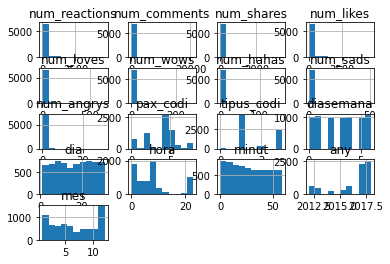

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates

p.hist()
plt.show()

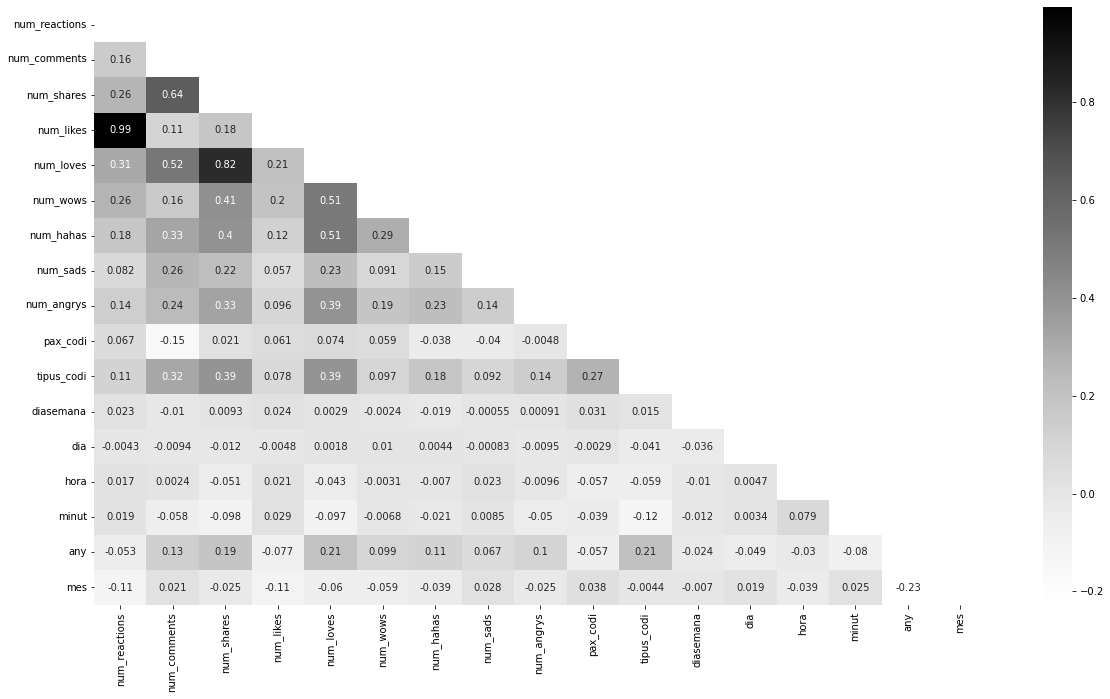

In [8]:
import seaborn as sns

plt.figure(figsize=(20,11))
cor = p.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.Greys)
plt.show()

[0.15253022 0.13168704]
588.8248128587798


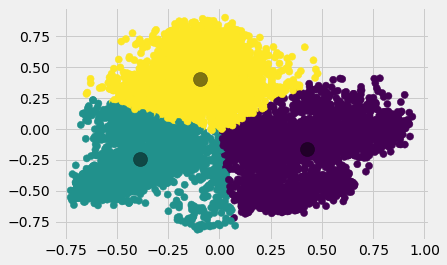

In [10]:
#afegit a posteriori perquè em vaig oblidar

# agrupament amb k-means
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_stand= scaler.fit_transform(p)

#normalitzar dades
data_scaled = normalize(data_stand)
data_scaled = pd.DataFrame(data_scaled, columns=p.columns)

#reduir la dimensionalitat
pca = PCA(n_components = 2)
Cprincipal = pca.fit_transform(data_scaled)
Cprincipal = pd.DataFrame(Cprincipal)
Cprincipal.columns = ['CP1', 'CP2']
print(pca.explained_variance_ratio_)

kmeans = KMeans(n_clusters=3)
kmeans.fit(Cprincipal)
y_kmeans = kmeans.predict(Cprincipal)

print(kmeans.inertia_)

plt.scatter(Cprincipal['CP1'], Cprincipal['CP2'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


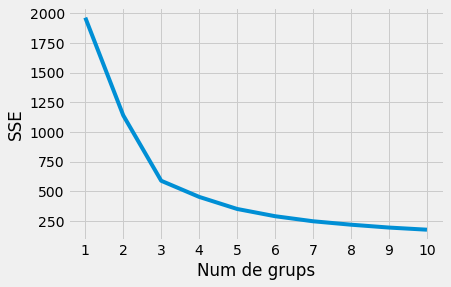

3

In [9]:
# trobar el millor núm. de grups pel mètode colze
from kneed import KneeLocator

kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Cprincipal)
    sse.append(kmeans.inertia_)

# representar els valors de SSE per estimar el punt colze
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Num de grups")
plt.ylabel("SSE")
plt.show()

#trobar el núm. de grups amb KneeLocator
kl = KneeLocator(
   range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

[0.15253022 0.13168704]


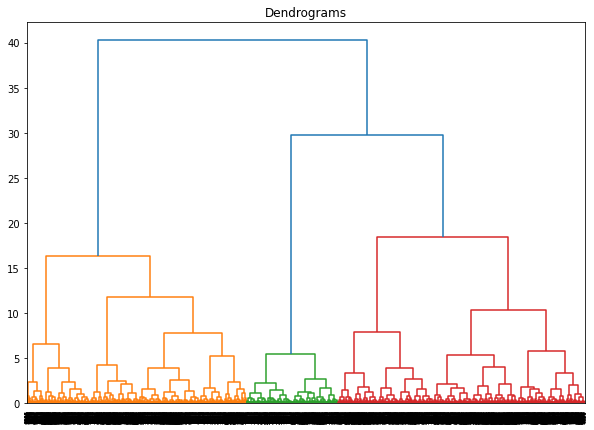

In [11]:
# agrupació jerarquica

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# primer núm. de grups amb dendogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Cprincipal, method='ward'))

#resultat 3 igual que amb k-means-colze

0.4150177467689425


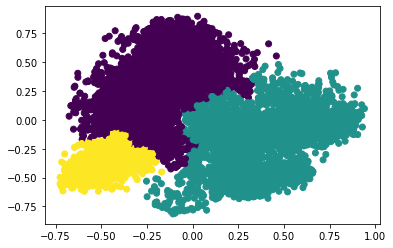

In [12]:
# aplicar algoritme
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

print(silhouette_score(Cprincipal, cluster.fit_predict(Cprincipal), random_state=42))

#dibuixar grups
plt.scatter(Cprincipal['CP1'], Cprincipal['CP2'], c=cluster.labels_)

In [13]:
#Optimització de paràmetres de l'algoritme comparat amb euclidean-ward

param_grid = {'affinity': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2'],
    'linkage': ['complete', 'average', 'single']}
SS = []
para =[]
for i in param_grid['affinity']:
    for j in param_grid['linkage']:
        AC = AgglomerativeClustering(n_clusters=3, affinity=i, linkage=j)
        para.append(i[0:2]+'='+j[0:2])
        SS.append(
        silhouette_score(Cprincipal, AC.fit_predict(Cprincipal), random_state=42))

for z in range(len(SS)):
    print('coeficient silhouete per', para[z], 'és', SS[z])
print()
print('coeficient silhouete màxim és', max(SS), 'per', para[SS.index(max(SS))])

coeficient silhouete per eu=co és 0.4117767225963571
coeficient silhouete per eu=av és 0.4566993246364302
coeficient silhouete per eu=si és 0.12100861818138509
coeficient silhouete per ma=co és 0.3537342873647922
coeficient silhouete per ma=av és 0.40234670120007315
coeficient silhouete per ma=si és 0.12100861818138509
coeficient silhouete per co=co és 0.4648908003030999
coeficient silhouete per co=av és 0.4639621041010028
coeficient silhouete per co=si és 0.11523794022396976
coeficient silhouete per l1=co és 0.3537342873647922
coeficient silhouete per l1=av és 0.40234670120007315
coeficient silhouete per l1=si és 0.12100861818138509
coeficient silhouete per l2=co és 0.4117767225963571
coeficient silhouete per l2=av és 0.4566993246364302
coeficient silhouete per l2=si és 0.12100861818138509

coeficient silhouete màxim és 0.4648908003030999 per co=co


0.4648908003030999


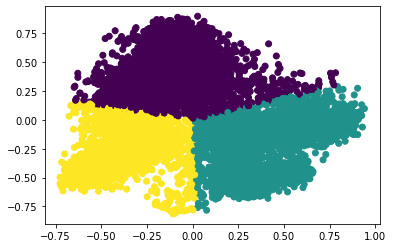

In [14]:
# executar l'algoritme amb els paràmetres optims i representació

clusterop = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')  

print(silhouette_score(Cprincipal, clusterop.fit_predict(Cprincipal), random_state=42))

#dibuixar grups 
plt.scatter(Cprincipal['CP1'], Cprincipal['CP2'], c=clusterop.labels_)

In [15]:
# tot i que s'ha millorat la línea de separació dels grups formats per la primera i segona component principal,
# possiblement no es un bon model, ja que la variabilitat de les dades pel PCA de 2 components només explica un
print(round(pca.explained_variance_ratio_.sum()*100, 2), '%')

28.42 %
